# Estudio de tipos de trabajo

## 1. Cargando datos

In [75]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [119]:
df_postulantes_educacion = pd.read_csv("../Data/fiuba_1_postulantes_educacion.csv", low_memory=False)
df_postulantes_genero_y_edad = pd.read_csv("../Data/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)
df_vistas = pd.read_csv("../Data/fiuba_3_vistas.csv", low_memory=False)
df_postulaciones = pd.read_csv("../Data/fiuba_4_postulaciones.csv", low_memory=False)
df_aviso_online = pd.read_csv("../Data/fiuba_5_avisos_online.csv", low_memory=False)
df_avisos_detalle = pd.read_csv("../Data/fiuba_6_avisos_detalle.csv", low_memory=False)

# 2. Tipos de trabajos

In [120]:
datos = df_avisos_detalle['tipo_de_trabajo'].value_counts()

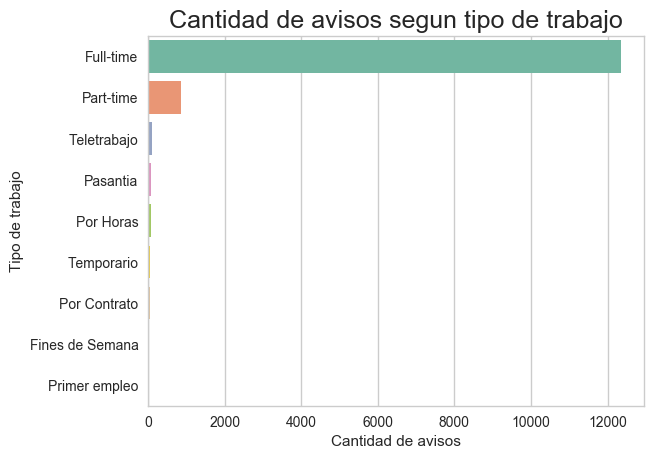

In [121]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se puede observar que el tipo de trabajo principal es el full-time y luego bastante detras viene Part-time. Respecto a los demas su cantidad es minima.

In [122]:
datos = df_avisos_detalle[-df_avisos_detalle['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]['tipo_de_trabajo'].value_counts()

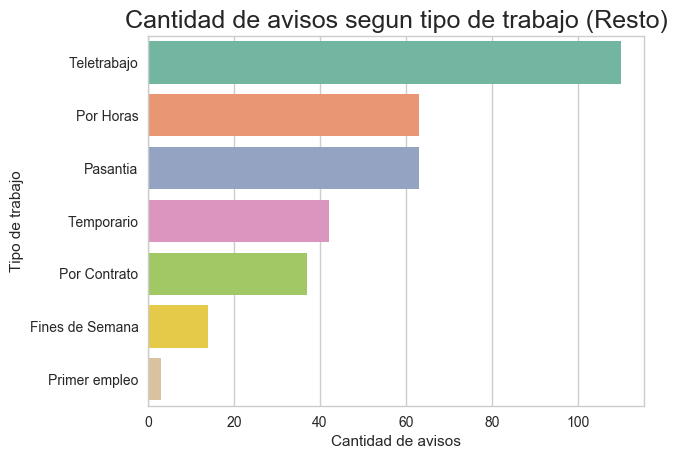

In [123]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo (Resto)', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se observa una gran cantidad de avisos por teletrabajo y luego pasantia con por horas estan a la par.

# 3. Tipos de trabajo segun area

In [124]:
df_avisos_detalle_ft = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Full-time']
df_avisos_detalle_pt = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Part-time']

## 3.1 Areas con trabajo Full-time

In [125]:
datos = df_avisos_detalle_ft['nombre_area'].value_counts().head(10)

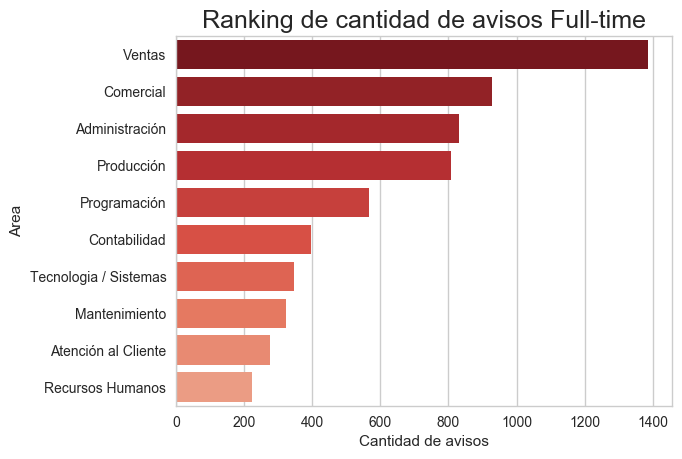

In [126]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Reds_r', 15))
g.set_title('Ranking de cantidad de avisos Full-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

Podemos ver que las areas que mas vienen apariciendo en este tp son precisamente las que tienen mas avisos del tipo full-time

## 3.2 Areas de trabajo Part-time

In [127]:
datos = df_avisos_detalle_pt['nombre_area'].value_counts().head(10)

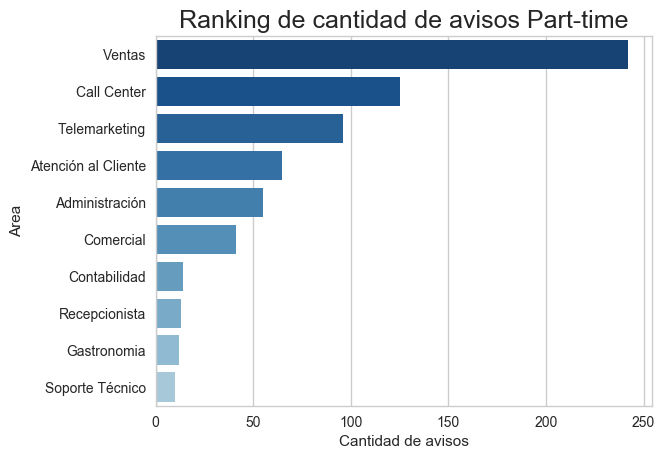

In [128]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Ranking de cantidad de avisos Part-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

A diferencia de full-time, en part-time callcenter, telemarketing y atencion al cliente influyen mucho mas.

## 3.3 Areas Teletrabajo

In [129]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Teletrabajo']['nombre_area'].value_counts().head(10)

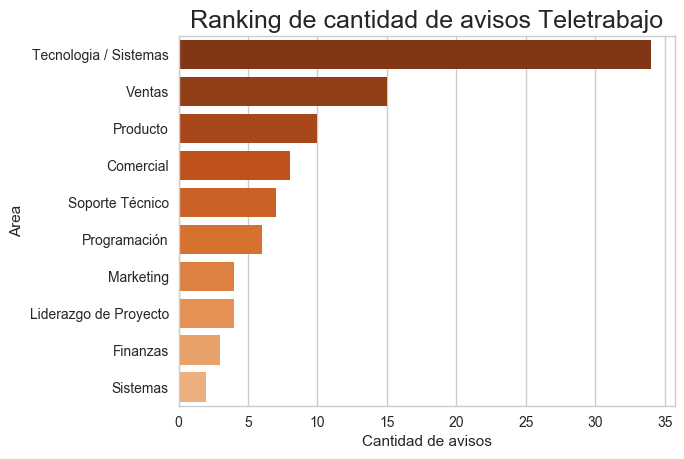

In [130]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Oranges_r', 15))
g.set_title('Ranking de cantidad de avisos Teletrabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.4 Area Pasantia

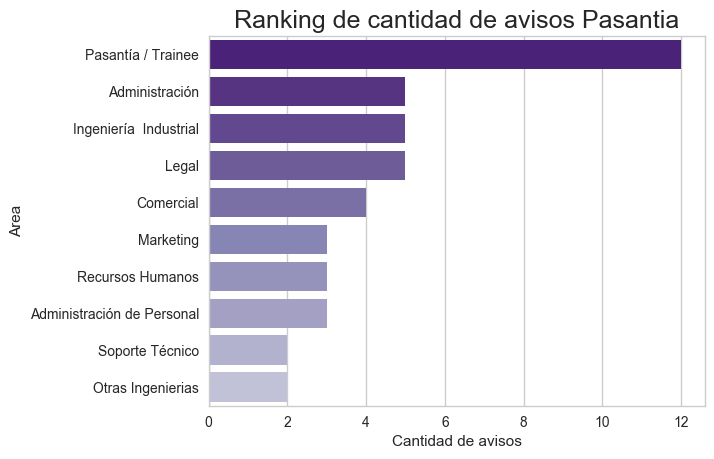

In [131]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Pasantia']['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Purples_r', 15))
g.set_title('Ranking de cantidad de avisos Pasantia', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.5 Area Por horas

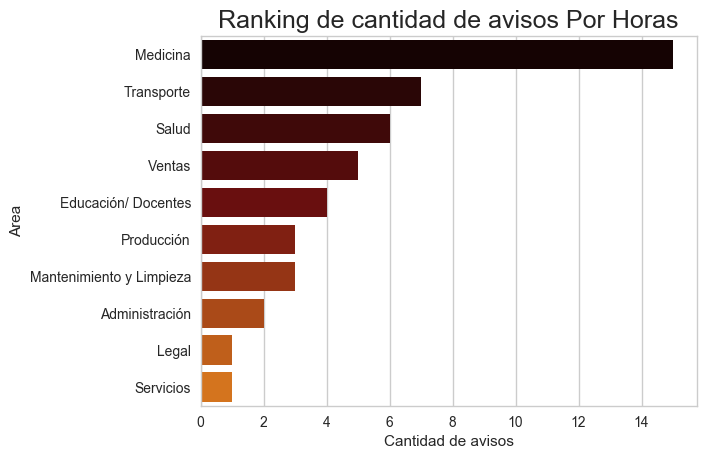

In [132]:
area = 'Por Horas'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('afmhot', 20))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

# 3.6 Temporario

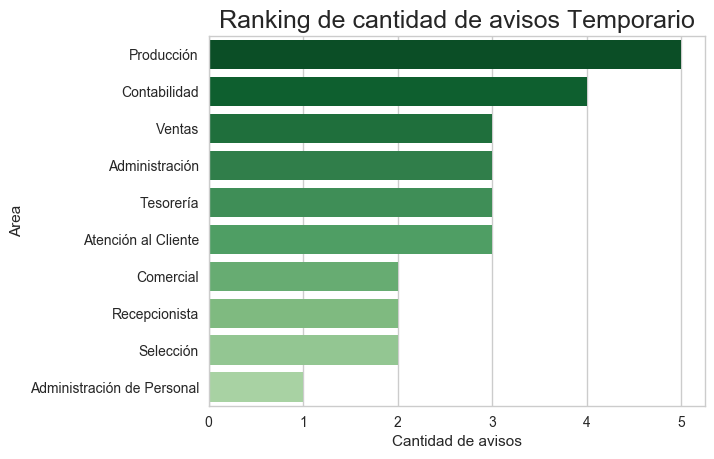

In [133]:
area = 'Temporario'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Greens_r', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.7 Por contrato

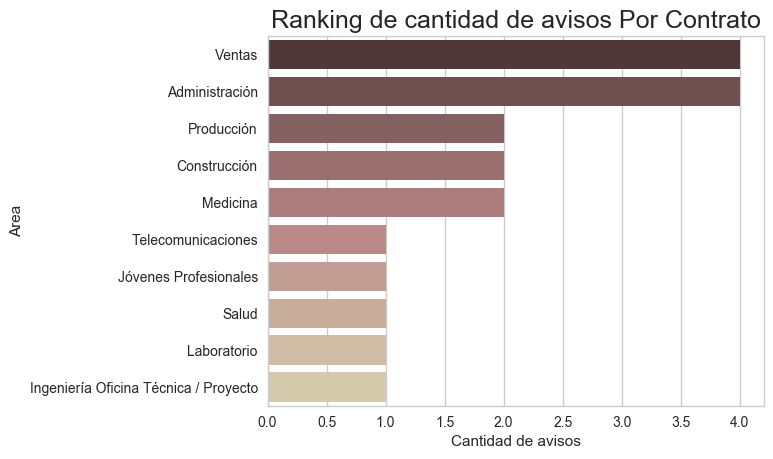

In [134]:
area = 'Por Contrato'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('pink', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.8 Resumen

In [135]:
df_avisos_no_pt_ft = df_avisos_detalle[-df_avisos_detalle['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]
df_avisos_no_pt_ft['nivel'] = 1

/home/victor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
df_areas_ppales = df_avisos_no_pt_ft[
    df_avisos_no_pt_ft['nombre_area'].isin(['Ventas', 'Tecnología', 'Comercial', 'Legal', 'Administración', 
                                            'Producción', 'Medicina', 'Contabilidad', 'Construcción', 'Sistemas',
                                            'Programación', 'Transporte', 'Salud'])
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Industrial'))
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Trainee'))
]

In [137]:
tabla = df_areas_ppales[['nombre_area', 'tipo_de_trabajo', 'nivel']].pivot_table(
    index='nombre_area', columns='tipo_de_trabajo', values='nivel', aggfunc='sum'
)

In [138]:
tabla

tipo_de_trabajo,Fines de Semana,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nombre_area,,,,,,,
Administración,NaN,5.0,4.0,2.0,NaN,NaN,3.0
Comercial,NaN,4.0,NaN,1.0,NaN,8.0,2.0
Construcción,NaN,NaN,2.0,NaN,NaN,NaN,1.0
Contabilidad,NaN,NaN,1.0,NaN,NaN,NaN,4.0
Ingeniería Industrial,NaN,5.0,NaN,NaN,NaN,NaN,1.0
Legal,NaN,5.0,1.0,1.0,NaN,NaN,NaN
Medicina,1.0,NaN,2.0,15.0,NaN,NaN,1.0
Pasantía / Trainee,NaN,12.0,NaN,NaN,NaN,NaN,NaN
Producción,NaN,1.0,2.0,3.0,NaN,NaN,5.0


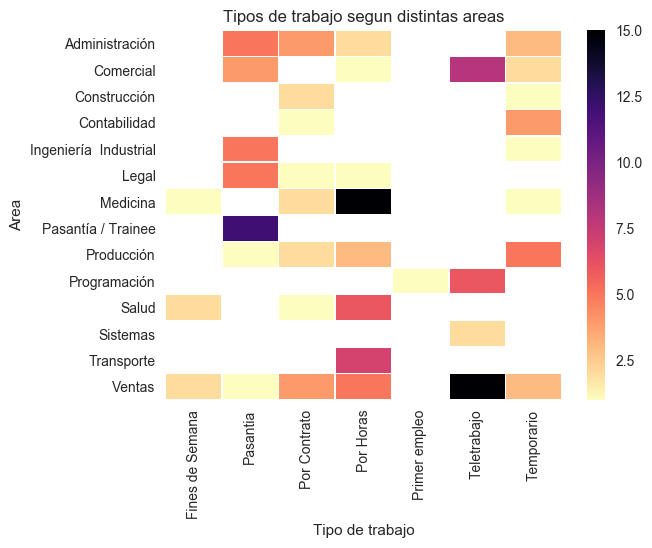

In [165]:
g = sns.heatmap(tabla, cmap='magma_r', linewidths=0.5)
g.set_title('Tipos de trabajo segun distintas areas');
g.set_ylabel('Area');
g.set_xlabelbelbelbelbelbelbelbelbel('Tipo de trabajo');

## 4. Segun sexo

In [140]:
# Filtro las edades
df_postulantes_genero_y_edad['fechanacimiento_dt'] = pd.to_datetime(df_postulantes_genero_y_edad['fechanacimiento'],
                                                                   errors='coerce')

In [141]:
df_postulantes_genero_y_edad['edad'] = 2018 - df_postulantes_genero_y_edad['fechanacimiento_dt'].dt.year

In [142]:
df_postulantes_genero_y_edad = df_postulantes_genero_y_edad[
    (df_postulantes_genero_y_edad['edad'] >= 18)
    & (df_postulantes_genero_y_edad['edad'] <= 65)
]

In [143]:
df_postulantes_genero_y_edad =df_postulantes_genero_y_edad[df_postulantes_genero_y_edad['sexo'] != 'NO_DECLARA']

In [144]:
df_postulaciones_sexo = pd.merge(df_postulantes_genero_y_edad, df_postulaciones,
                                on='idpostulante', how='inner')

In [145]:
df_avisos_sexo = pd.merge(df_postulaciones_sexo, df_avisos_detalle, on='idaviso', how='inner')

In [146]:
datos_pt_ft = df_avisos_sexo[df_avisos_sexo['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]
datos_no_pt_ft = df_avisos_sexo[-df_avisos_sexo['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]

## 4.1 Full-time y Part-time

### 4.1.1 Postulacioes

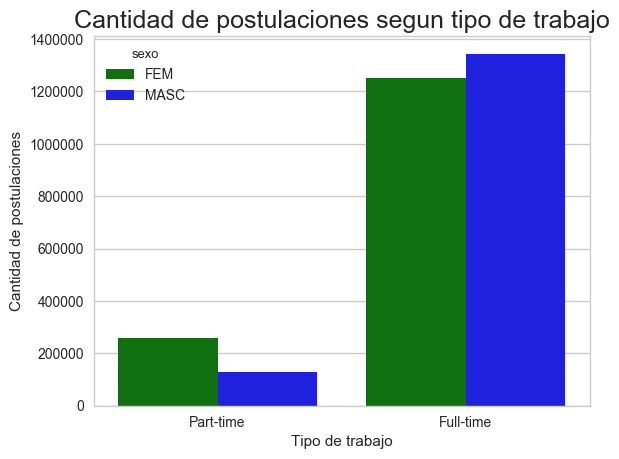

In [147]:
g = sns.countplot(x='tipo_de_trabajo', hue='sexo', data=datos_pt_ft, palette=['Green', 'Blue'])
g.set_title('Cantidad de postulaciones segun tipo de trabajo', fontsize=18);
g.set_xlabel('Tipo de trabajo');
g.set_ylabel('Cantidad de postulaciones');

Hay mas mujeres en part-time, pero mas hombres en full-time

## 4.2 Resto

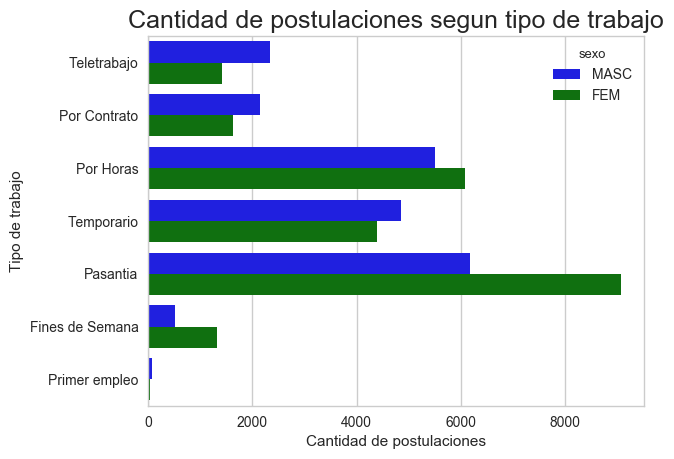

In [148]:
g = sns.countplot(y='tipo_de_trabajo', hue='sexo', data=datos_no_pt_ft, palette=['Blue', 'Green'])
g.set_title('Cantidad de postulaciones segun tipo de trabajo', fontsize=18);
g.set_ylabel('Tipo de trabajo');
g.set_xlabel('Cantidad de postulaciones');

# 5. Edad

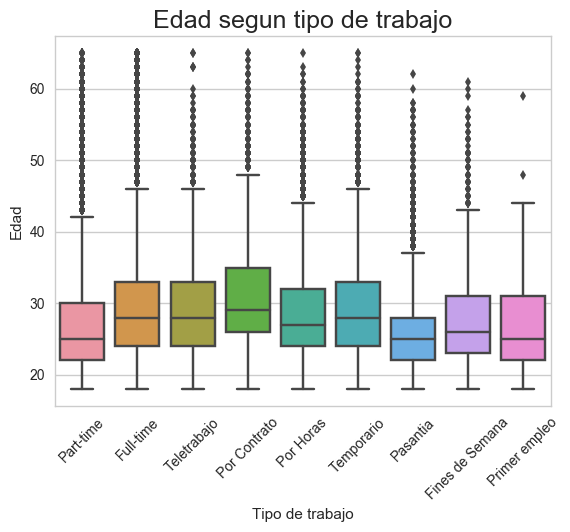

In [149]:
g = sns.boxplot(x='tipo_de_trabajo', y='edad', data=df_avisos_sexo)
g.set_title('Edad segun tipo de trabajo', fontsize=18);
g.set_ylabel('Edad');
g.set_xlabel('Tipo de trabajo');
g.set_xticklabels(g.get_xticklabels(), rotation=45);

- Mayor edad = Por contrato, luego Full-time y teletrabajo.
- menor edad = Part-time y pasantia
- mayoria bajo los 40 años

## 6. Empresas

## 6.1 Empresas Full-time

In [178]:
datos = df_avisos_detalle_ft['denominacion_empresa'].value_counts().head(10)

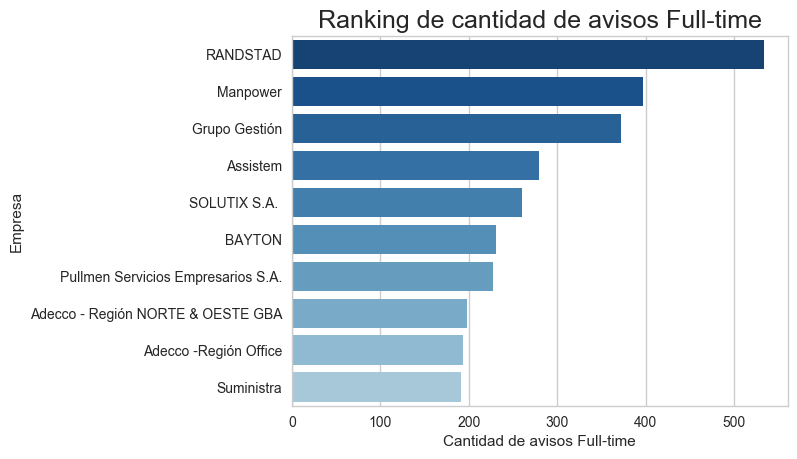

In [179]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Ranking de cantidad de avisos Full-time', fontsize=18);
g.set_xlabel('Cantidad de avisos Full-time');
g.set_ylabel('Empresa');

## 6.2 Part-time

In [180]:
datos = df_avisos_detalle_pt['denominacion_empresa'].value_counts().head(10)

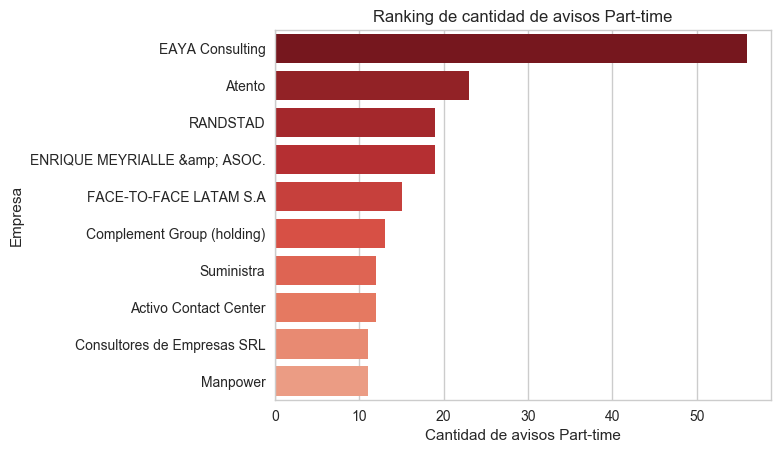

In [181]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Reds_r',15))
g.set_title('Ranking de cantidad de avisos Part-time');
g.set_xlabel('Cantidad de avisos Part-time');
g.set_ylabel('Empresa');

### 6.3 Teletrabajo

In [154]:
tipo = 'Teletrabajo'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)

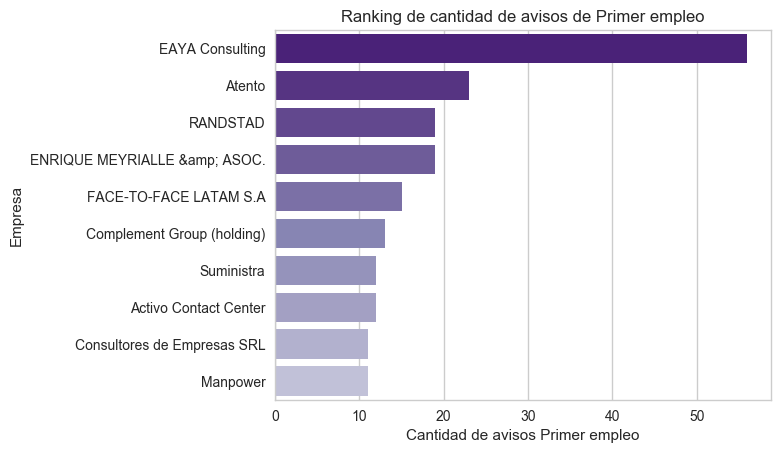

In [182]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Purples_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

### 6.4 Por Contrato

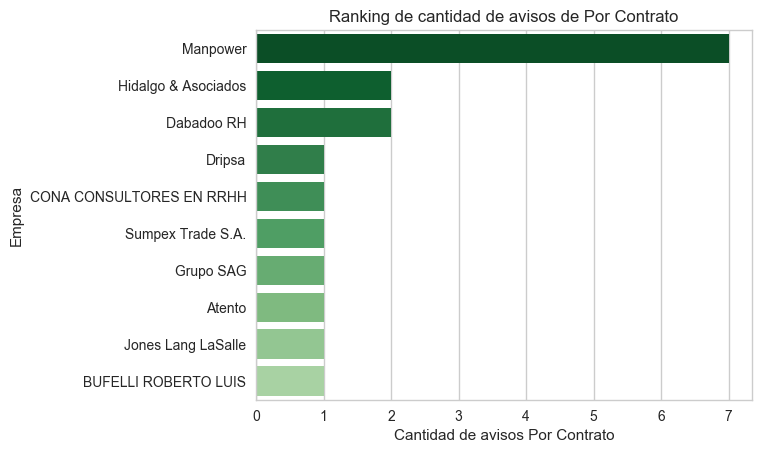

In [184]:
tipo = 'Por Contrato'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Greens_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

## 6.5 Por horas

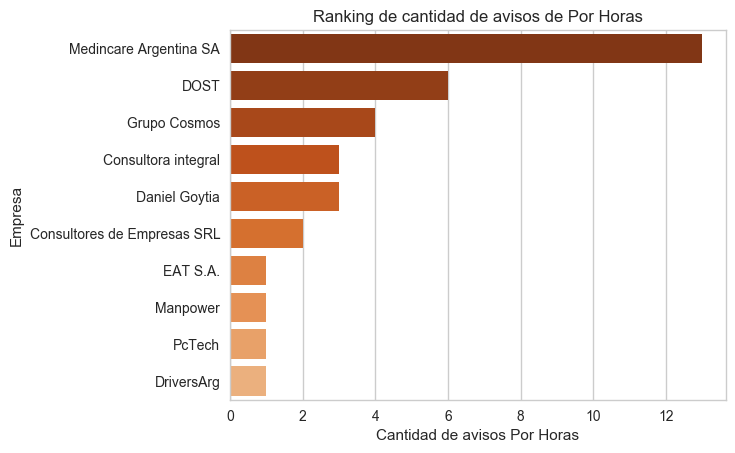

In [190]:
tipo = 'Por Horas'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Oranges_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

### 6.6 Temporario

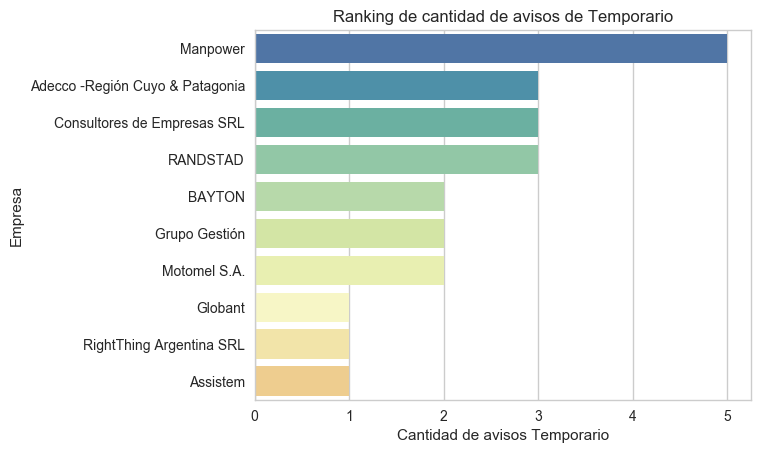

In [194]:
tipo = 'Temporario'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Spectral_r', 15) )
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

## 6.7 Pasantia

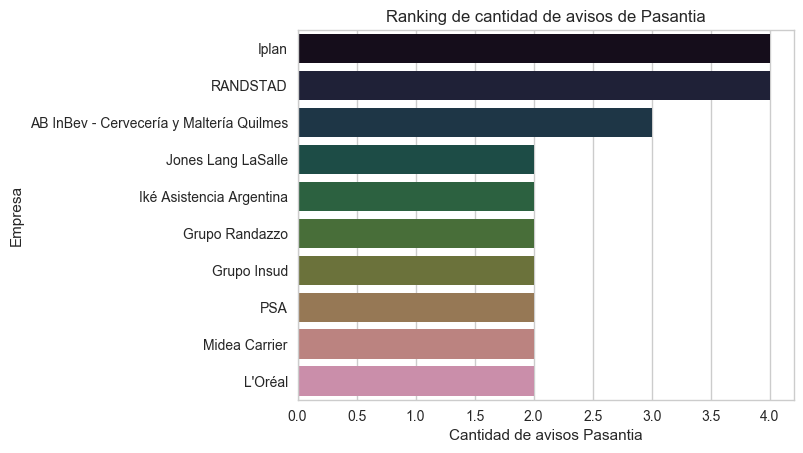

In [208]:
tipo = 'Pasantia'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('cubehelix', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

## 6.8 Fines de semana

In [209]:
tipo = 'Fines de Semana'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette='bens')
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

ValueError: bens is not a valid palette name

In [161]:
datos = df_avisos_detalle[(df_avisos_detalle['tipo_de_trabajo'] == 'Fines de Semana')]['titulo'].value_counts()

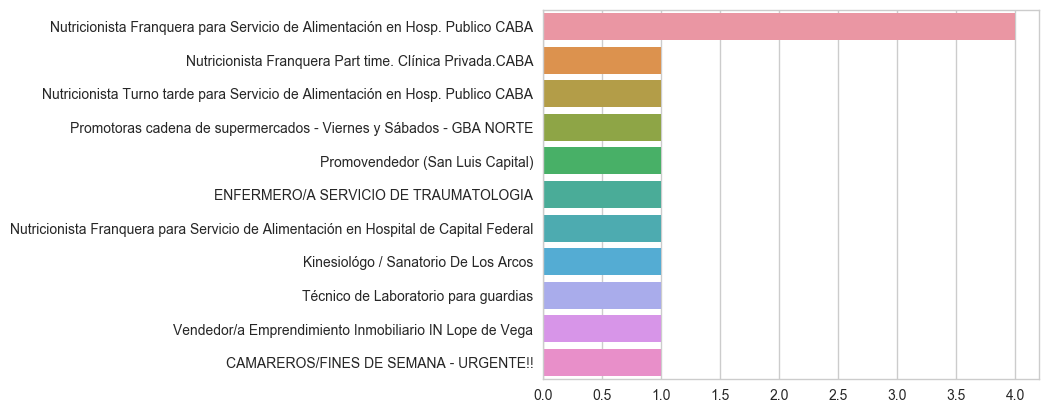

In [162]:
g = sns.barplot(y=datos.index, x=datos.values)

###  6.9 Primer empleo

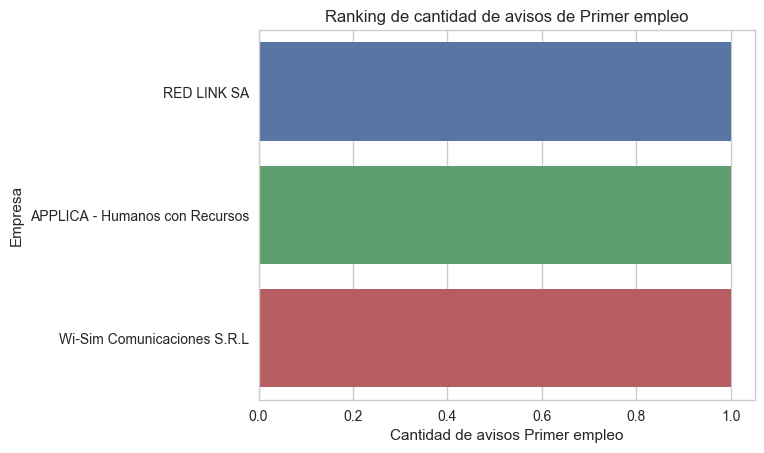

In [163]:
tipo = 'Primer empleo'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values)
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo));
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

In [164]:
df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Primer empleo']['titulo']

2880                          Programa Trainee INICIA2017
6111    Personal con conocimientos en informática y redes
6155    Vendedor de Seguros -  Estudiantes de La Tecni...
Name: titulo, dtype: object